In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

result_dir = './neuralnetwork/results'

In [3]:
import pandas as pd
import numpy as np
import random
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from src.utils import to_np
from src.plot import plot_result

In [4]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 200

In [5]:
# set random seed
rand_seed = 4592
np.random.seed(rand_seed)
torch.manual_seed(rand_seed)
random.seed(rand_seed)

In [30]:
normalize_target = True
normalize_features = True

if not normalize_target:
    data = pd.read_csv('./data/cleaned_data.csv', index=False)
else: # normalize target
    if normalize_features:
        data = pd.read_csv('./data/cleaned_data_normalize_feature_target.csv')
    else:
        data = pd.read_csv('./data/cleaned_data_normalized_target.csv')

data.head()

,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,Formate
0,0.333333,0.686275,1.00,1.0,1.000000,0.00,0.00,0.23,0.12,0.00,0.61
1,0.333333,0.647059,0.80,1.0,0.907061,0.20,0.00,0.23,0.07,0.00,0.66
2,0.333333,0.627451,0.50,1.0,0.767652,0.50,0.00,0.34,0.05,0.03,0.52
3,0.333333,0.607843,0.10,1.0,0.581774,0.90,0.01,0.42,0.05,0.02,0.42
4,0.333333,0.588235,0.05,1.0,0.558539,0.95,0.04,0.48,0.05,0.10,0.19


In [31]:
# reshuflle the data
data = data.sample(frac=1, random_state=rand_seed).reset_index(drop=True)
data.head()

,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,Formate
0,0.555556,0.941176,0.03,0.570819,0.549245,0.97,0.109287,0.134479,0.203244,0.1818,0.109758
1,0.555556,0.725490,0.50,1.000000,0.767652,0.50,0.010000,0.270000,0.070000,0.0300,0.580000
2,0.331111,0.784314,0.05,0.570819,0.558539,0.95,0.210000,0.280000,0.100000,0.1400,0.190000
3,1.000000,0.921569,1.00,1.000000,1.000000,0.00,0.000000,0.180000,0.370000,0.0000,0.330000
4,1.000000,0.862745,0.03,1.000000,0.549245,0.97,0.100000,0.050000,0.270000,0.2600,0.090000


In [8]:
# normalize the data to range [value/max, value/max]
feature_column = ['cDen', 'Pot', 'Sn %', 'pH', 'weight', 'Cu %']
target_column = ['Formate', 'EtoH', 'H2']
data.head()

,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,Formate
0,0.555556,0.941176,0.03,0.570819,0.549245,0.97,0.109287,0.134479,0.203244,0.1818,0.109758
1,0.555556,0.725490,0.50,1.000000,0.767652,0.50,0.010000,0.270000,0.070000,0.0300,0.580000
2,0.331111,0.784314,0.05,0.570819,0.558539,0.95,0.210000,0.280000,0.100000,0.1400,0.190000
3,1.000000,0.921569,1.00,1.000000,1.000000,0.00,0.000000,0.180000,0.370000,0.0000,0.330000
4,1.000000,0.862745,0.03,1.000000,0.549245,0.97,0.100000,0.050000,0.270000,0.2600,0.090000


In [9]:
num_points = data.shape[0]
X = torch.from_numpy(data[feature_column].values).float()
y = torch.from_numpy(data[target_column].values).float()
print(X.shape, y.shape)

torch.Size([50, 6]) torch.Size([50, 3])


In [10]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_seed)
# print the shape of the training, validation, and testing set
print(f"Train: {int(100*X_train.shape[0]/num_points)} % of total data")
print(f"Test: {int(100*X_test.shape[0]/num_points)} % of total data")

Train: 70 % of total data
Test: 30 % of total data


In [11]:
from src.trainer import train_models

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Usage
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
number_of_models = 4

results = train_models(X_train, y_train, X_test, y_test,  architecture =[6, 16, 16, 16, 3], n_models=number_of_models, steps=1000, lr=1e-2)

# Unpack results
model_list, epoch, train_loss_list, test_loss_list = zip(*results)

Training model 0
Epoch: 0, Train Loss: 0.274, Test Loss: 0.121
Epoch: 100, Train Loss: 0.007, Test Loss: 0.006
Epoch: 200, Train Loss: 0.004, Test Loss: 0.004
Epoch: 300, Train Loss: 0.002, Test Loss: 0.003
Epoch: 400, Train Loss: 0.002, Test Loss: 0.004
Epoch: 500, Train Loss: 0.001, Test Loss: 0.004
Epoch: 600, Train Loss: 0.001, Test Loss: 0.004
Epoch: 700, Train Loss: 0.001, Test Loss: 0.004
Epoch: 800, Train Loss: 0.001, Test Loss: 0.003
Epoch: 900, Train Loss: 0.000, Test Loss: 0.003
Training model 1
Epoch: 0, Train Loss: 0.309, Test Loss: 0.181
Epoch: 100, Train Loss: 0.009, Test Loss: 0.008
Epoch: 200, Train Loss: 0.005, Test Loss: 0.004
Epoch: 300, Train Loss: 0.004, Test Loss: 0.003
Epoch: 400, Train Loss: 0.003, Test Loss: 0.003
Epoch: 500, Train Loss: 0.002, Test Loss: 0.003
Epoch: 600, Train Loss: 0.001, Test Loss: 0.004
Epoch: 700, Train Loss: 0.001, Test Loss: 0.004
Epoch: 800, Train Loss: 0.001, Test Loss: 0.003
Epoch: 900, Train Loss: 0.001, Test Loss: 0.003
Training m

In [26]:
plot_target_column = ['HCOO', 'C_2H_5OH', 'H_2'] #[r'$\rm HCOOH$', r'$\rm C_2H_5OH$', r'$\rm H_2$']
output_train_list = [model(X_train) for model in model_list]
output_test_list = [model(X_test) for model in model_list]

# save the model
for i, model in enumerate(model_list):
    torch.save(model.state_dict(), f'{result_dir}/model_{i}.pth')
    np.save(f'{result_dir}/output_train_model_{i}', to_np(output_train_list[i]))
    np.save(f'{result_dir}/output_test_model_{i}', to_np(output_test_list[i]))

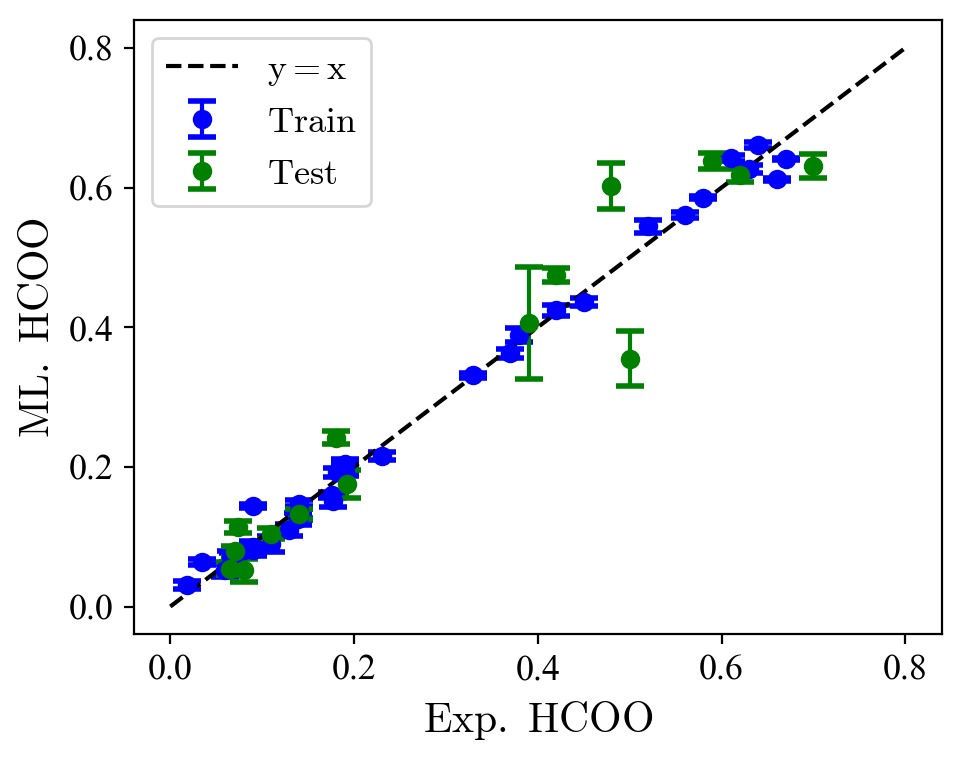

In [27]:
plot_result(output_train_list, output_test_list, y_train, y_test, plot_target_column, index=0, max_value=0.8, normalised=True, figsize=(5, 4))

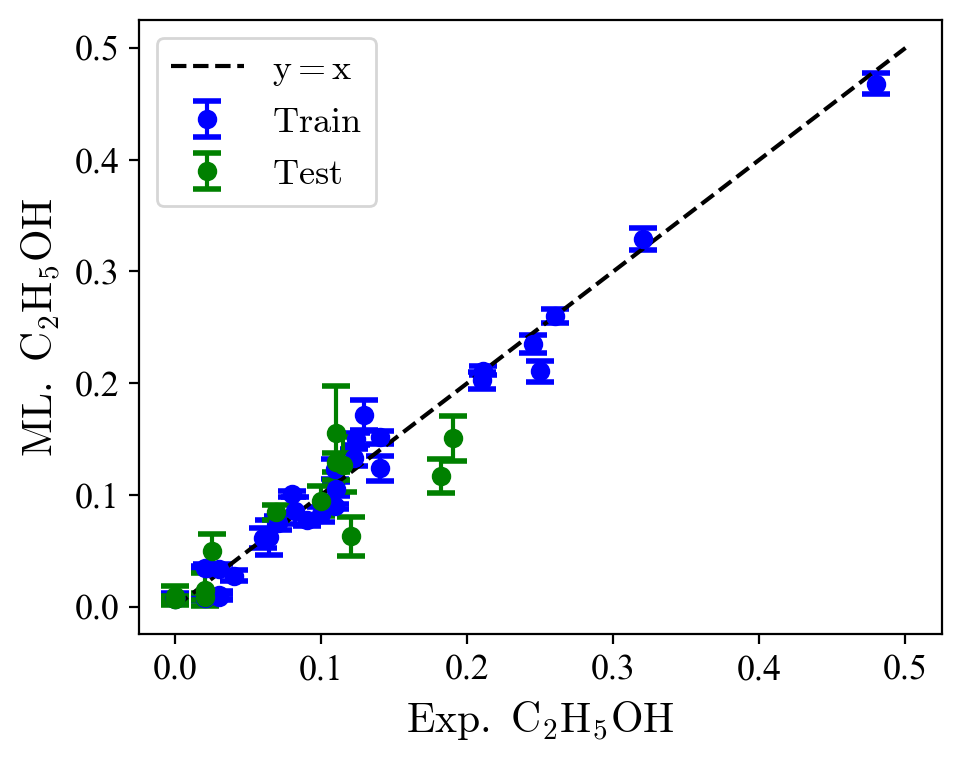

In [14]:
plot_result(output_train_list, output_test_list, y_train, y_test, plot_target_column, index=1, max_value=0.5, normalised=True, figsize=(5, 4))

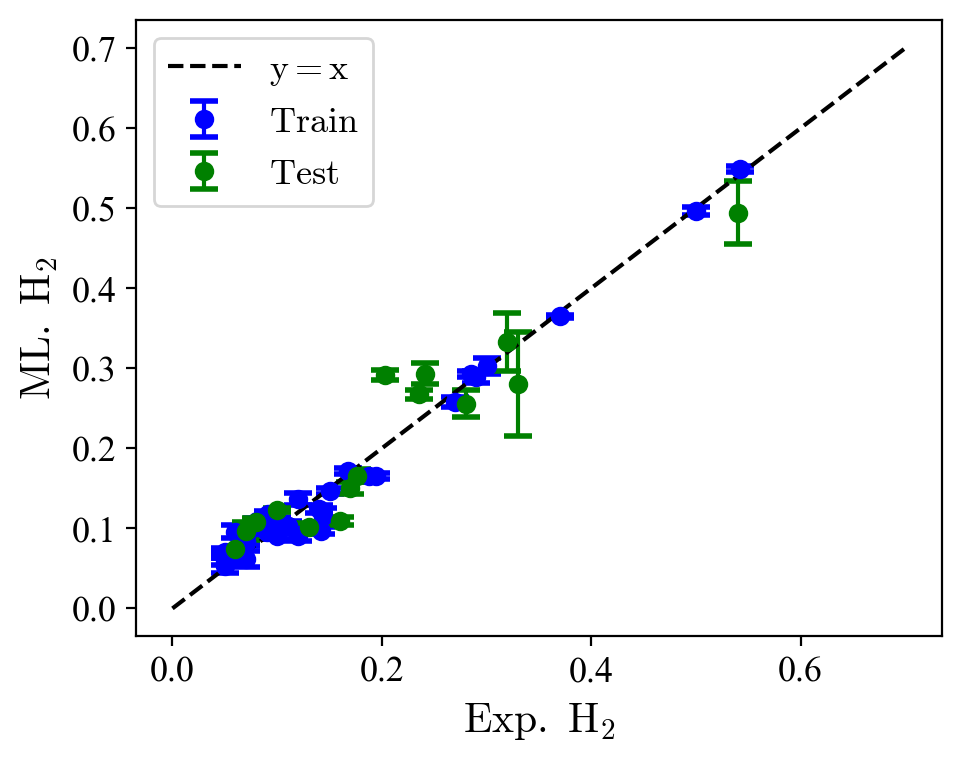

In [15]:
plot_result(output_train_list, output_test_list, y_train, y_test, plot_target_column, index=2, max_value=0.7, normalised=True, figsize=(5, 4))

In [29]:
from src.utils import calculate_and_write_metrics
# Usage
calculate_and_write_metrics(y_train, y_test, output_train_list, output_test_list, plot_target_column, result_dir)